In [3]:
include("../comum.jl")
include("../modelos.jl")
using Evolutionary, Plots;
pyplot();

In [37]:
Ts     = 0.05 # Intervalo entre leituras da saída
tend   = 2.0  # tempo final para estabilização
t0     = 0.0  # instante inicial

popul  = 20   # população
iterac = 15   #iterações
α = 10.       #parâmetro para o erro
β = 0.01      #parâmetro para o jerk
γ = 0.1       #parâmetro para o torque
per = 1/2     #inicio da leitura do vetor a parti de per do comprimento total

x1, v1, a1, j1 = minimumjerkf(0.0, 0.0, 0.0,0.0, 0.6, 0.0, 0.0, tend)
x2, v2, a2, j2 = minimumjerkf(0.0, 0.0, 0.0,0.0, 0.8, 0.0, 0.0, tend)
xr = [x1,x2]
vr = [v1,v2]
ar = [a1, a2]
jr = [j1,j2];

In [11]:
kp_end = AbstractFloat[]
kv_end = AbstractFloat[];

# Custo

In [22]:
function generateCusto(junta::Integer)
    out = function custo(gain::Vector{Float64})
        kp = SMatrix{2,2}(diagm([gain[1], gain[2]]))
        kv = SMatrix{2,2}(diagm([gain[3], gain[4]]))
        x, v, t, a, ta, j, tj, τ, t_tau = robot2dof(kp, kv, Ts, t0, tend, xr, vr)
        
        sizeVector = length(x[1])
        erro_sum = 0.
        erro = -(x[junta] .- map(i->xr[junta](i), t))
        erro_sum += sum(abs.(erro[floor(Integer,sizeVector*per):end])) 

        jerk_sum = 0.
        jerk_sum += sum(abs.(j[junta]))
        
        torque_sum = 0.
        torque_sum += sum(abs.(τ[junta]))
        
        torque_dif = 0.
        torque_dif += sum(abs.(diff(τ[junta])))
        
        
        erro_sum = erro_sum * α
        jerk_sum = jerk_sum * β 
        torque_sum = torque_sum * γ
        println(" $(erro_sum) | $(jerk_sum) | $(torque_sum) | $(torque_dif)")
        out =  erro_sum + jerk_sum + torque_sum + torque_dif
        out
    end
end;

# Otimização junta 2

In [23]:
function gerador2(n)
    n = n/2
    kp = push!(zeros(n-1),rand()*rand([10.,100.,1000.,10000]))
    kv = push!(zeros(n-1),rand()*rand([10.,100.,1000.]))
    vcat(kp,kv)
end;

In [25]:
N = 4
 result, fitness, cnt = ga(generateCusto(2), N; initPopulation = gerador2, populationSize = popul, ɛ = 0.1, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

 Progress:|███████████████████████████████████████████████████| 0.0% 3.7608887860028832 | 0.7754046754166304 | 4.037798957432988 | 5.540811900372974
 0.18590687408098272 | 0.9587961655584551 | 4.0588605890449285 | 5.562186672542354
 0.40352990253452514 | 1.5861294204944083 | 4.062143424035089 | 5.568282676339982
 0.02673143250402188 | 1.2252862692718032 | 4.057370701835122 | 5.595931421461994
 0.07494926042553196 | 1.1129016868447383 | 4.0584344560648615 | 5.543811102111791
 7.70495886964695 | 2.1431026737344543 | 4.084748618493019 | 6.000061034852739
 23.214643313997172 | 2.312507961314089 | 3.945359021876896 | 5.843125186484713
 4.967699026901926 | 2.0959200435775402 | 4.0976643675961295 | 6.036002567775136
 0.12656812097319337 | 78.20214713442535 | 4.13944421249242 | 35.34923995917718
 0.11284573425158095 | 1.2826020905170505 | 4.057226589462664 | 5.531171032063609
 2.2756219515797844 | 0.7787492306574214 | 4.0488401259240225 | 5.505353929012822
 14.193291711447289 | 1.5063801086833

 0.1975538391770426 | 1.35242222306544 | 4.057765566901899 | 5.597955500056849
 0.1182599853673233 | 1.0250280551248354 | 4.059848034798157 | 5.5470496514577095
 0.4136021851428717 | 0.9054646617132107 | 4.05687845187653 | 5.523488623000595
 0.422788475194133 | 0.908979412695584 | 4.057745890095932 | 5.539500058345154
 0.07414470682022611 | 0.8757140595670657 | 4.059610465499159 | 5.544772968020899
 0.18412056217621042 | 0.8410073343102714 | 4.059287640830732 | 5.540863345023784
 0.07414470682022611 | 0.8757140595670657 | 4.059610465499159 | 5.544772968020899
 Progress:|██████████████████████████████████████████████████| 26.7% 0.16632634985126848 | 0.8410643097545877 | 4.091919351732662 | 5.6217690282588535
 0.27817314598286735 | 1.4751577780554226 | 4.060542569066393 | 5.623616992350852
 0.13780078303656074 | 1.5157357471107553 | 4.060282550422051 | 5.597537061381257
 0.0732415213273585 | 1.1051468855713054 | 4.059190525705034 | 5.538575572878177
 0.3786322582759194 | 0.98959270265477

 0.09483303058969994 | 1.0085392710755272 | 4.05787851379063 | 5.5407947155208515
 0.12845999897187765 | 0.8547016311781976 | 4.064322404642447 | 5.550551872397795
 0.1259309804685399 | 0.8712178979273075 | 4.063148890200247 | 5.521632445046389
 0.07612724907434976 | 1.3437295012326846 | 4.05391848122862 | 5.59437881057074
 0.14239722437480618 | 0.8591373273185181 | 4.055826761852343 | 5.515508371949465
 0.0941519398498658 | 0.8569568051281129 | 4.068424818990231 | 5.570335945664824
 0.11294682810393752 | 0.8706692330748078 | 4.069860562909997 | 5.574823132786052
 0.08909654869363626 | 0.9753861008512761 | 4.061198748806395 | 5.555423235746234
 0.08616823791449069 | 0.9870550392335353 | 4.058284052043568 | 5.5871734302853575
 0.07869730456588342 | 0.8520318151642384 | 4.056908766595139 | 5.515945082304139
 Progress:|███████████████████████████████████████████████████| 60.0% 0.08208568583793263 | 0.8518915965778335 | 4.060237847816634 | 5.560999203156571
 0.07905030632663124 | 0.8922793

 0.10349645812912145 | 0.8512231901483116 | 4.0633756287230485 | 5.5542070178218665
 0.07869730456588342 | 0.8520318151642384 | 4.056908766595139 | 5.515945082304139
 0.08386378177363984 | 0.8670457961617021 | 4.060617619256446 | 5.554033769448258
 0.08175558851155007 | 0.8574542066429679 | 4.059417133808675 | 5.548582850992645
 0.08515200045462634 | 0.8572257067985196 | 4.060260883171469 | 5.550104190992069
 0.08539830158416584 | 0.8563028417871001 | 4.059740461081275 | 5.549594104153796
 0.08347097719743624 | 1.2854533288932826 | 4.058938958436574 | 5.564871927982807
 0.08362297185661338 | 0.8696806693104421 | 4.060717178012058 | 5.580718864525456
 0.08319839860389866 | 0.9184247323404974 | 4.057712105556098 | 5.563788328244258
 0.08225927544804834 | 1.3149544444638555 | 4.060036387697452 | 5.593851335055638
 0.07869730456588342 | 0.8520318151642384 | 4.056908766595139 | 5.515945082304139
 0.11566836252792423 | 1.5734742721087551 | 4.058619387386003 | 5.649915860756552
 0.08604722958

([-0.00861136, 2996.68, -4.46903e-5, 66.5882], 10.5035829686294, 15, 0.0, Dict{Symbol,Any}())

In [31]:
push!(kp_end, result[2])
push!(kv_end, result[4])
Markdown.parse("---|junta 2\n---|---\n**KP**|$(round(result[2],2))\n**KV**|$(round(result[4],2))")

|     –- | junta 2 |
| ------:| -------:|
| **KP** | 2996.68 |
| **KV** |   66.59 |


# Otimização junta 1

In [32]:
function gerador1(n)
    n = n/2
    kp = push!(zeros(n-2),rand()*rand([10.,100.,1000.,10000]))
    push!(kp,result[2])
    kv = push!(zeros(n-2),rand()*rand([10.,100.,1000.]))
    push!(kv,result[4])
    vcat(kp,kv)
end;

In [33]:
N = 4
 result, fitness, cnt = ga(generateCusto(1), N; initPopulation = gerador1, populationSize = popul, ɛ = 0.1, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

 Progress:|███████████████████████████████████████████████████| 0.0% 10.332454108464432 | 0.7897033945047502 | 103.5091070842723 | 11.599124090479325
 446.8546684439805 | 6.188906523722726 | 27.814126614704833 | 40.807294448112614
 9.884767170218247 | 14.495438156238807 | 103.41166325903532 | 136.38934730644831
 8.172217388653504 | 21.300295382577705 | 103.46612113451825 | 199.87327439145304
 0.5756054565656943 | 26.090201531684762 | 102.31848977374241 | 244.71275914960157
 8.305141771311265 | 3.3320651429883164 | 103.31283724628031 | 35.579128949287025
 147.89826127336613 | 8.39471245466028 | 99.6330045313811 | 61.489442668885566
 2.0909606668425527 | 0.7953724691502292 | 102.50075567486275 | 12.21197234449242
 436.5645976756024 | 7.117375639012855 | 26.94866903237319 | 40.18789729869122
 0.7989210178198886 | 2.721329115479538 | 102.31300326476499 | 30.47664292207666
 63.175620630875514 | 1.7040635790090393 | 108.21744191273133 | 17.59470511614832
 114.1790648154915 | 5.23758646787147

 0.7746898407514952 | 0.9382053598229491 | 102.31006330099937 | 13.584931619920223
 0.8580874023132218 | 0.7556062869768537 | 102.32350138304798 | 11.861053786670965
 0.8580874023132218 | 0.7556062869768537 | 102.32350138304798 | 11.861053786670965
 Progress:|██████████████████████████████████████████████████| 26.7% 0.869115639663211 | 0.957711633497332 | 102.32354451005558 | 13.761064525679785
 0.8789102936962773 | 0.9591460023184081 | 102.32494385887958 | 13.773654993228693
 0.8580874023132218 | 0.7556062869768537 | 102.32350138304798 | 11.861053786670965
 1.1159520100547815 | 0.812334913614075 | 102.35963602822284 | 12.467904509493316
 2.3121438077485266 | 0.900790404847736 | 102.5306453644796 | 13.202940844394202
 3.2632979339784134 | 0.9565126767895389 | 102.66461171759025 | 13.702512868508386
 0.9138523690175065 | 0.8103713459445565 | 102.33050514725753 | 12.379195323172674
 0.917849364804888 | 1.1116952148353405 | 102.33028426260951 | 15.252960980246211
 2.329449409668075 | 0.88

 1.3793816411620163 | 0.7744357340088182 | 102.39893446225426 | 11.980713024917883
 0.8833826656021804 | 0.7606397315857786 | 102.32709080123773 | 11.94421659728264
 0.735627896055257 | 0.7537390087707266 | 102.30561527673684 | 11.874083156745943
 0.8050623828382281 | 0.7523365833516147 | 102.31581482350191 | 11.848496631718476
 0.833509076623502 | 0.7468914607286361 | 102.32011948347768 | 11.83631847457453
 1.0430182162325508 | 0.8016019059840958 | 102.34935713700389 | 12.313499040870894
 1.061074196472983 | 0.7664140640431897 | 102.35280868187805 | 12.018040269585978
 1.061074196472983 | 0.7664140640431897 | 102.35280868187805 | 12.018040269585978
 1.9365300905128007 | 0.8315367031419798 | 102.47809647915702 | 12.56237766889286
 1.0430182162325508 | 0.8016019059840958 | 102.34935713700389 | 12.313499040870894
 0.9709393666795246 | 0.7563142422735746 | 102.33998338682822 | 11.916003211183
 0.735627896055257 | 0.7537390087707266 | 102.30561527673684 | 11.874083156745943
 Progress:|████

 0.8349202996454475 | 0.7435094818654386 | 102.32024556361192 | 11.793416411226687
 0.8660478524342297 | 0.7466024271420072 | 102.32488380948148 | 11.845120309760667
 1.1193130098937187 | 0.7623479867765585 | 102.36121667386625 | 12.014410963785142
 0.7725776320015992 | 0.7385141212084042 | 102.31132722351097 | 11.753674445360822
 1.3039482639837296 | 0.7540381801378002 | 102.38823368630902 | 11.875885227697129
 0.9477379818718235 | 0.7632813597659778 | 102.33632443163646 | 11.973730816728466
 2.060238004083317 | 0.7952522293927818 | 102.49629028796357 | 12.231682159150761
 2.1435610323031455 | 0.7895670904296813 | 102.5081851764454 | 12.117073794247322
 0.7725776320015992 | 0.7385141212084042 | 102.31132722351097 | 11.753674445360822
 0.7725776320015992 | 0.7385141212084042 | 102.31132722351097 | 11.753674445360822
 1.9610417253032426 | 0.7614885411284987 | 102.48210420003355 | 11.900566136265585
 1.050993245008454 | 0.7671937812996368 | 102.35143698387056 | 11.965571801917026
 1.4070

([6748.16, 2996.68, 969.85, 66.5882], 115.57609342208181, 15, 0.0, Dict{Symbol,Any}())

In [66]:
push!(kp_end, result[1])
push!(kv_end, result[3])
Markdown.parse("---|junta 1\n---|---\n**KP**|$(round(result[1],2))\n**KV**|$(round(result[3],2))")

|     –- | junta 1 |
| ------:| -------:|
| **KP** | 6748.16 |
| **KV** |  969.85 |


# Resultado otimização

In [85]:
kp = SMatrix{2,2}(diagm(flipdim(kp_end[1:2],1)))
kv = SMatrix{2,2}(diagm(flipdim(kv_end[1:2],1)))
x, v, t, a, ta, j, tj, τ, t_tau = robot2dof(kp, kv, Ts, t0, tend, xr, vr)
erro1 = -(x[1] .- map(i->xr[1](i), t))
erro2 = -(x[2] .- map(i->xr[2](i), t))
erro = [erro1, erro2]

function plotx()
    p1 = plot(t,x[1], label = "PD ótimo - junta 1",xlabel ="tempo (s)", ylabel = "posição (rad)")
    p1= plot!(t,map(i->xr[1](i), t), label = "referência");
    p2 = plot(t,x[2], label = "PD ótimo - junta 2",xlabel ="tempo (s)", ylabel = "posição (rad)")
    p2 = plot!(t,map(i->xr[2](i), t), label = "referência");
    plot(p1,p2, title = "Posição")
end

function plotj()
    p1 = plot(tj,j[1], label = "PD ótimo - junta 1", xlabel ="tempo (s)", ylabel = "Arrancada (rad/s³)")
    p2 = plot(tj,j[2], label = "PD ótimo - junta 2",xlabel ="tempo (s)", ylabel = "Arrancada (rad/s³)")
    plot(p1,p2, title = "Arrancada")
end;

function plotTau()
    p1 = plot(t_tau,τ[1], label = "PD ótimo - junta 1", xlabel ="tempo (s)", ylabel = "Torque (Nm)")
    p2 = plot(t_tau,τ[2], label = "PD ótimo - junta 2",xlabel ="tempo (s)", ylabel = "Torque (Nm)")
    plot(p1,p2, title = "Torque")
end;

function plotv()
    p1 = plot(t,v[1], label = "PD ótimo - junta 1", xlabel ="tempo (s)", ylabel = "Velocidade (rad/s)")
    p2 = plot(t,v[2], label = "PD ótimo - junta 2",xlabel ="tempo (s)", ylabel = "Velocidade (rad/s)")
    plot(p1,p2, title = "Velocidade")
end;

function plota()
    p1 = plot(ta,a[1], label = "PD ótimo - junta 1", xlabel ="tempo (s)", ylabel = "Aceleração (rad/s²)")
    p2 = plot(ta,a[2], label = "PD ótimo - junta 2",xlabel ="tempo (s)", ylabel = "Aceleração (rad/s²)")
    plot(p1,p2, title = "Aceleração")
end;


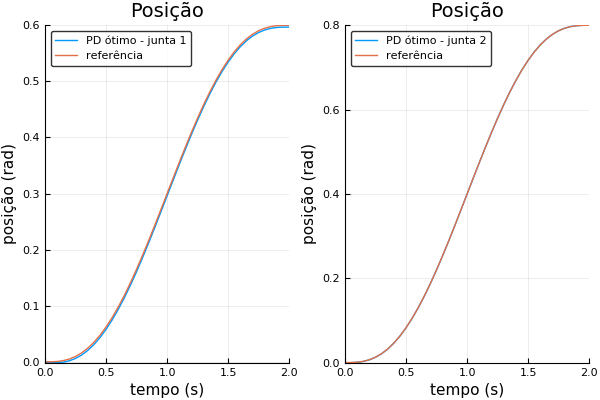

In [69]:
plotx()

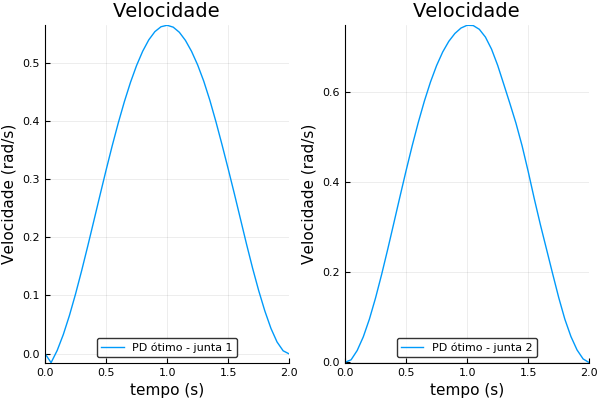

In [70]:
plotv()

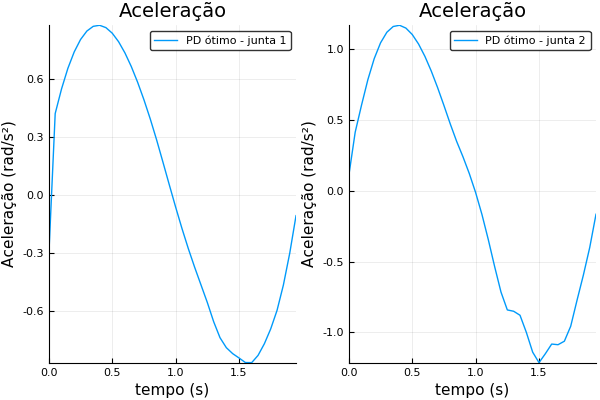

In [71]:
plota()

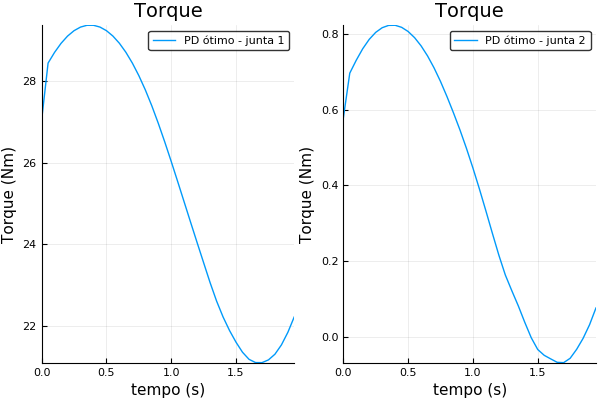

In [82]:
plotTau()

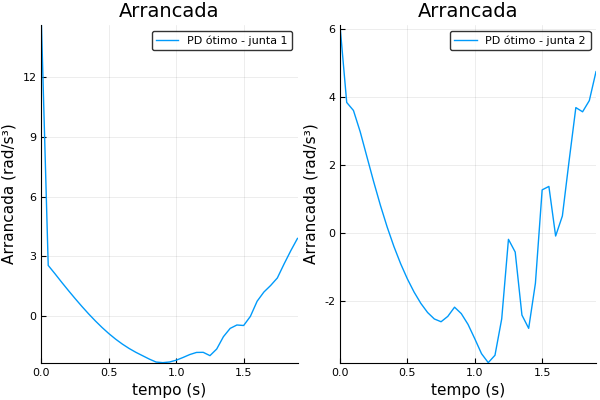

In [72]:
plotj()

# Simulação PD

In [84]:
#kp_pid = SMatrix{2,2}(diagm([2800., 80.]))
#kv_pid = SMatrix{2,2}(diagm([315., 15.]))
kp_pid = SMatrix{2,2}(diagm([8550., 160.]))
kv_pid = SMatrix{2,2}(diagm([415., 15.]))
x_pid, v_pid, t_pid, a_pid, ta_pid, j_pid, tj_pid, τ_pid, t_tau_pid = robot2dof(kp_pid, kv_pid, Ts, t0, tend, xr,vr)
erro1_pd = -(x_pid[1] .- map(i->xr[1](i), t_pid))
erro2_pd = -(x_pid[2] .- map(i->xr[2](i), t_pid))


erro_pd = [erro1_pd, erro2_pd]

function plotx_pd()
    p1 = plot(t_pid,x_pid[1], label = "PD - junta 1",xlabel ="tempo (s)", ylabel = "posição (rad)")
    p1= plot!(t_pid,map(i->xr[1](i), t_pid), label = "referência");
    p2 = plot(t_pid,x_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "posição (rad)")
    p2 = plot!(t_pid,map(i->xr[2](i), t_pid), label = "referência");
    plot(p1,p2, title = "Posição")
end

function plotj_pd()
    p1 = plot(tj_pid,j_pid[1], label = "PD - junta 1", xlabel ="tempo (s)", ylabel = "Arrancada (rad/s³)")
    p2 = plot(tj_pid,j_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "Arrancada (rad/s³)")
    plot(p1,p2, title = "Arrancada")
end;

function plotTau_pd()
    p1 = plot(t_tau_pid,τ_pid[1], label = "PD - junta 1", xlabel ="tempo (s)", ylabel = "Torque (Nm)")
    p2 = plot(t_tau_pid,τ_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "Torque (Nm)")
    plot(p1,p2, title = "Torque")
end;

function plotv_pd()
    p1 = plot(t_pid,v_pid[1], label = "PD - junta 1", xlabel ="tempo (s)", ylabel = "Velocidade (rad/s)")
    p2 = plot(t_pid,v_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "Velocidade (rad/s)")
    plot(p1,p2, title = "Velocidade")
end;

function plota_pd()
    p1 = plot(ta_pid,a_pid[1], label = "PD - junta 1", xlabel ="tempo (s)", ylabel = "Aceleração (rad/s²)")
    p2 = plot(ta_pid,a_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "Aceleração (rad/s²)")
    plot(p1,p2, title = "Aceleração")
end;

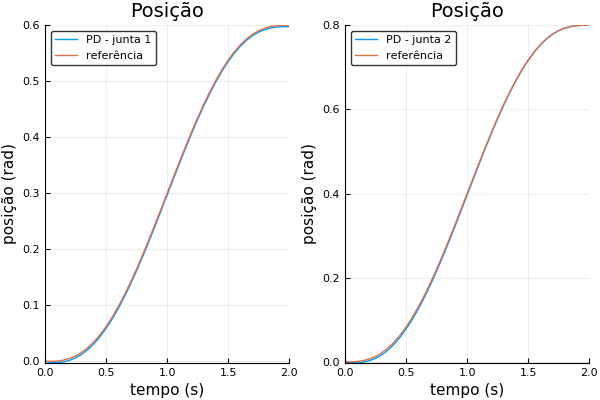

In [77]:
plotx_pd()

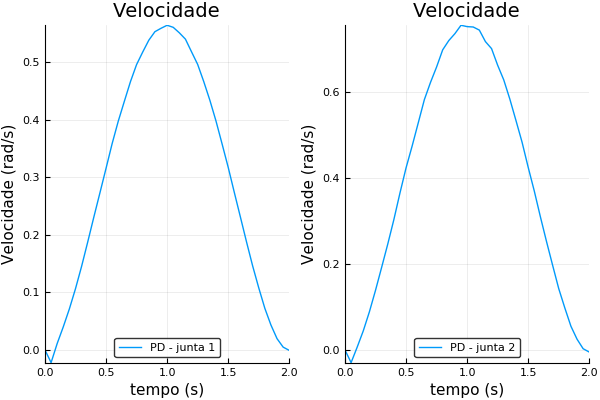

In [78]:
plotv_pd()

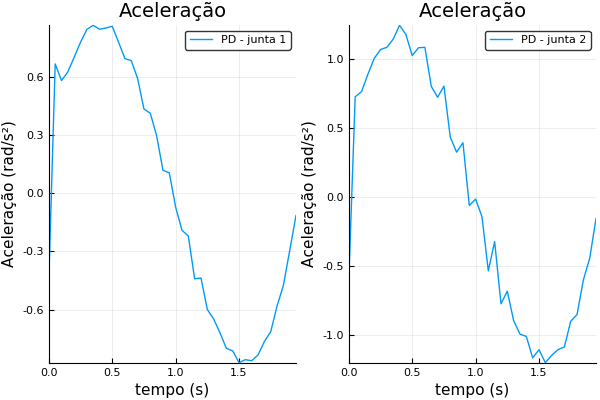

In [80]:
plota_pd()

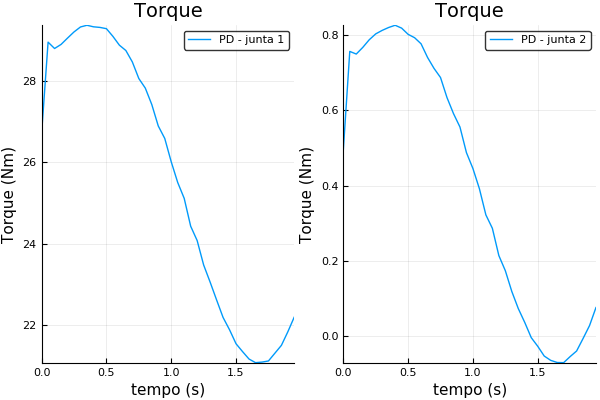

In [83]:
plotTau_pd()

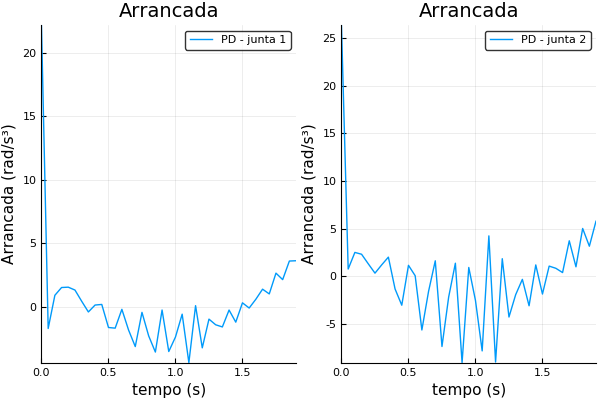

In [81]:
plotj_pd()

# Comparativo

## Erro

In [86]:
tabela(erro_pd, "Erro PD")

|                 –- | junta 1 | junta 2 |
| ------------------:| -------:| -------:|
| **Erro PD máximo** |     0.0 |    0.01 |
| **Erro PD mínimo** |     0.0 |     0.0 |
|  **Erro PD total** |    0.12 |     0.1 |


In [87]:
tabela(erro, "Erro Otimizado")

|                        –- | junta 1 | junta 2 |
| -------------------------:| -------:| -------:|
| **Erro Otimizado máximo** |     0.0 |     0.0 |
| **Erro Otimizado mínimo** |     0.0 |     0.0 |
|  **Erro Otimizado total** |    0.14 |    0.01 |


## Torque

In [88]:
tabela(τ_pid, "Torque PD")

|                   –- | junta 1 | junta 2 |
| --------------------:| -------:| -------:|
| **Torque PD máximo** |   29.37 |    0.83 |
| **Torque PD mínimo** |   21.08 |     0.0 |
|  **Torque PD total** | 1022.86 |   16.98 |


In [89]:
tabela(τ, "Torque Otimizado")

|                          –- | junta 1 | junta 2 |
| ---------------------------:| -------:| -------:|
| **Torque Otimizado máximo** |   29.38 |    0.82 |
| **Torque Otimizado mínimo** |   21.09 |     0.0 |
|  **Torque Otimizado total** | 1023.11 |   16.95 |


## Jerk

In [90]:
tabela(j_pid, "Jerk PD")

|                 –- | junta 1 | junta 2 |
| ------------------:| -------:| -------:|
| **Jerk PD máximo** |   22.19 |   26.34 |
| **Jerk PD mínimo** |    0.08 |    0.05 |
|  **Jerk PD total** |   80.55 |  131.14 |


In [91]:
tabela(j, "Jerk otimizado")

|                        –- | junta 1 | junta 2 |
| -------------------------:| -------:| -------:|
| **Jerk otimizado máximo** |   14.61 |     6.1 |
| **Jerk otimizado mínimo** |    0.01 |    0.09 |
|  **Jerk otimizado total** |   73.85 |   90.11 |


# Teste

Esta parte é destinada a realização de teste quando ocorre a busca pelos ganhos ótimos por junta

In [34]:
kp_pid = SMatrix{2,2}(diagm(result[1:2]))
kv_pid = SMatrix{2,2}(diagm(result[3:4]))
x_pid, v_pid, t_pid, a_pid, ta_pid, j_pid, tj_pid, τ_pid, t_tau_pid = robot2dof(kp_pid, kv_pid, Ts, t0, tend, xr,vr);

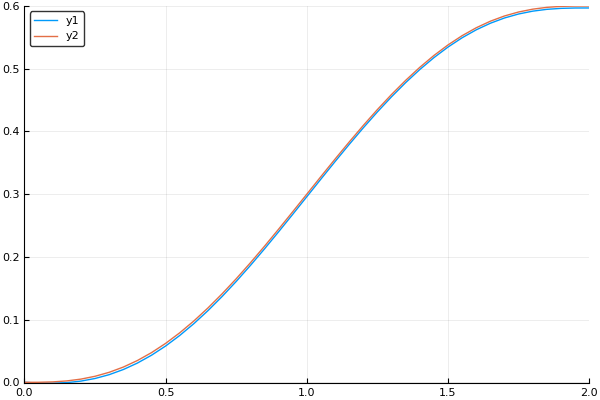

In [36]:
p1=plot(t_pid,x_pid[1])
p1 = plot!(t_pid,map(x->xr[1](x), t_pid))
plot(p1)